In [1]:
import numpy as np
from matplotlib import pyplot
import random

In [2]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, **kwargs)

In [3]:
# Delcare sample Dataset using numpy
# [1,0] -> 1 ~ Ack , 0 ~ beep
# [0,2] -> 0 ~ Ack , 2 ~ beep
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

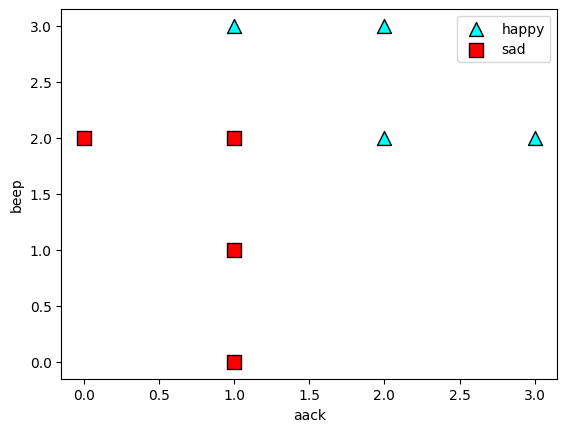

In [4]:
plot_points(features,labels)

In [5]:
def score(weights, bias, features):
    return np.dot(features, weights) + bias
def step(x):
    if x >= 0:
        return 1
    return 0
def prediction(weights, bias, features):
    return step(score(weights, bias, features))

In [6]:
def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))
    '''If the prediction is different from the label, then the point
    is misclassified, which means the error is equal to the
    absolute value of the score.'''

In [7]:
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [8]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    #Predict the point
    pred = prediction(weights, bias, features)
    # update its weight by formula
    # wi^ = (y-y^)* feature [words appearance count] * 0.01 [lr]
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

In [9]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
prediction(weights,bias,features[4])
# for i in range(len(features)):
#     print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

1

In [10]:
def perceptron_algorithm_test(features, labels, learning_rate = 0.01,epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = [] # An array to store the errors
    for epoch in range(epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1) # Picks a random point in our dataset
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    return weights, bias, errors

In [13]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    pyplot.show()
    pyplot.scatter(range(epochs), errors)
    return weights, bias

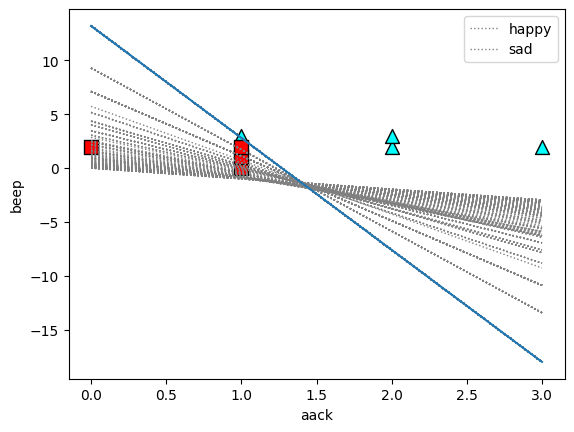

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

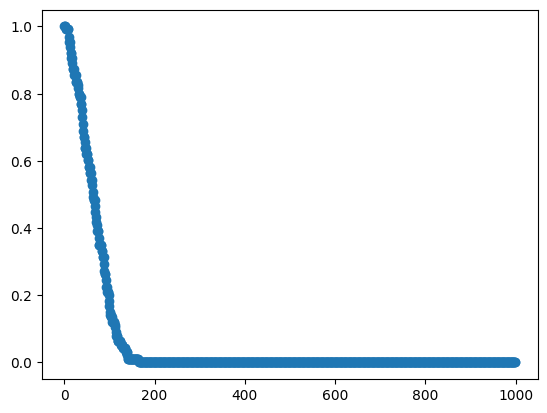

In [14]:
# Try to Test our classifier
weights, bias = perceptron_algorithm(features, labels)
weights, bias